In [1]:
from fastai.vision import *

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

In [3]:
bs = 64

In [4]:
np.random.seed(42)
data1 = ImageDataBunch.from_folder('data', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs//2).normalize(imagenet_stats)

data2 = ImageDataBunch.from_folder('data', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs//4).normalize(imagenet_stats)

data3 = ImageDataBunch.from_folder('data', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs//4).normalize(imagenet_stats)

data4 = ImageDataBunch.from_folder('data', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs//8).normalize(imagenet_stats)

data5 = ImageDataBunch.from_folder('data', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs//4).normalize(imagenet_stats)


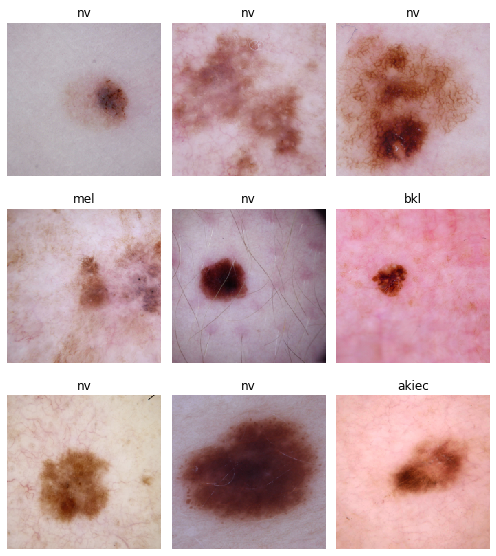

In [5]:
data1.show_batch(rows=3, figsize=(7,8))

In [5]:
metrics = [accuracy]

In [6]:
learn1 = cnn_learner(data1, models.resnet50, metrics=metrics, callback_fns=[partial(callbacks.CSVLogger, append=True)])
learn2 = cnn_learner(data2, models.resnet152, metrics=metrics, callback_fns=[partial(callbacks.CSVLogger, append=True)])
learn3 = cnn_learner(data3, models.densenet201, metrics=metrics, callback_fns=[partial(callbacks.CSVLogger, append=True)])
learn4 = cnn_learner(data4, models.vgg19_bn, metrics=metrics, callback_fns=[partial(callbacks.CSVLogger, append=True)])
learn5 = cnn_learner(data5, models.alexnet, metrics=metrics, callback_fns=[partial(callbacks.CSVLogger, append=True)])

In [8]:
learn = [learn1, learn2, learn3, learn4, learn5]

In [9]:
for mod in learn:
    mod.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.560386,1.046339,0.716925,02:12
1,0.906541,0.663705,0.776835,02:11
2,0.737682,0.605735,0.776335,02:12
3,0.650879,0.581625,0.788817,02:11
4,0.590695,0.509475,0.807788,02:07
5,0.505020,0.471954,0.824763,02:06
6,0.457779,0.449439,0.842237,02:07
7,0.400069,0.430450,0.850225,02:06
8,0.391076,0.421641,0.851722,02:06
9,0.357049,0.419300,0.857713,02:07


epoch,train_loss,valid_loss,accuracy,time
0,1.341851,0.904606,0.731403,03:38
1,0.875652,0.640653,0.773839,03:36
2,0.747464,0.583532,0.795307,03:36
3,0.622142,0.536148,0.807788,03:37
4,0.599055,0.491604,0.824763,03:35
5,0.499548,0.425545,0.844234,03:37
6,0.386532,0.402552,0.852222,03:37
7,0.388179,0.398337,0.852222,03:36
8,0.361080,0.397792,0.855217,03:38
9,0.339553,0.381288,0.858712,03:36


epoch,train_loss,valid_loss,accuracy,time
0,1.264580,0.849603,0.760359,04:04
1,0.769754,0.600522,0.796805,03:56
2,0.706114,0.524572,0.818273,03:55
3,0.585722,0.447503,0.837743,03:56
4,0.507762,0.405628,0.844234,03:57
5,0.431066,0.408784,0.851223,03:56
6,0.342102,0.367034,0.868697,03:57
7,0.297613,0.346407,0.879181,03:55
8,0.250794,0.337867,0.878183,03:56
9,0.261507,0.341527,0.872691,03:54


epoch,train_loss,valid_loss,accuracy,time
0,1.223514,0.845827,0.728407,03:26
1,0.912750,0.825702,0.719920,03:23
2,0.906052,0.775933,0.735896,03:24
3,0.759083,0.649207,0.771842,03:23
4,0.749776,0.591473,0.785821,03:24
5,0.730151,0.623105,0.772841,03:24
6,0.673244,0.582924,0.788318,03:24
7,0.639197,0.520869,0.812781,03:24
8,0.578790,0.515960,0.811782,03:24
9,0.589555,0.513449,0.810285,03:24


epoch,train_loss,valid_loss,accuracy,time
0,1.319233,0.872313,0.728407,02:18
1,0.962544,0.746971,0.744883,02:20
2,0.899110,0.805937,0.719920,02:17
3,0.820927,0.717483,0.745881,02:18
4,0.731766,0.670391,0.754368,02:17
5,0.748110,0.639756,0.768348,02:15
6,0.729771,0.617888,0.767349,02:16
7,0.667307,0.601092,0.769346,02:13
8,0.645323,0.600119,0.783325,02:11
9,0.649074,0.598453,0.770844,02:17


In [10]:
learn1.save('resnet50-stage-1')
learn2.save('resnet152-stage-1')
learn3.save('densenet201-stage-1')
learn4.save('vgg19_bn-stage-1')
learn5.save('alexnet-stage-1')

In [11]:
learn1.unfreeze()
learn2.unfreeze()
learn3.unfreeze()
learn4.unfreeze()
learn5.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: CUDA out of memory. Tried to allocate 254.00 MiB (GPU 0; 6.00 GiB total capacity; 3.67 GiB already allocated; 252.91 MiB free; 381.11 MiB cached)

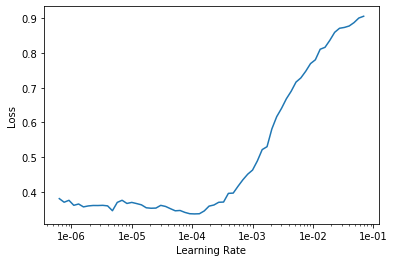

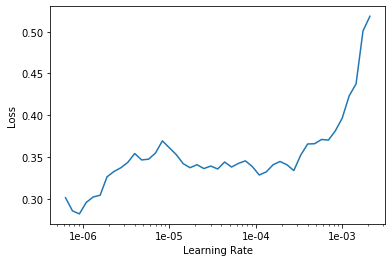

In [12]:
for mod in learn:
    mod.lr_find()
    mod.recorder.plot()

In [ ]:
learn1.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))
learn2.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))
learn3.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))
learn4.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))
learn5.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

In [ ]:
learn1.save('resnet50-stage-2')
learn2.save('resnet152-stage-2')
learn3.save('densenet201-stage-2')
learn4.save('vgg19_bn-stage-2')
learn5.save('alexnet-stage-2')

In [ ]:
#### lines below for analysis of results, dont run!!!

In [7]:
learn1.load('resnet50-stage-1');
learn1.load('resnet50-stage-1');
learn2.load('resnet152-stage-1');
learn3.load('densenet201-stage-1');
learn4.load('vgg19_bn-stage-1');
learn5.load('alexnet-stage-1');

In [8]:
interp1 = ClassificationInterpretation.from_learner(learn1)
interp2 = ClassificationInterpretation.from_learner(learn2)
interp3 = ClassificationInterpretation.from_learner(learn3)
interp4 = ClassificationInterpretation.from_learner(learn4)
interp5 = ClassificationInterpretation.from_learner(learn5)

In [55]:
interps = [[interp1,'resnet50'], 
           [interp2,'resnet152'], 
           [interp3,'densenet201'], 
           [interp4,'vgg19'], 
           [interp4,'alexnet']]

resnet50


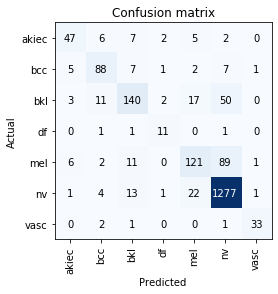

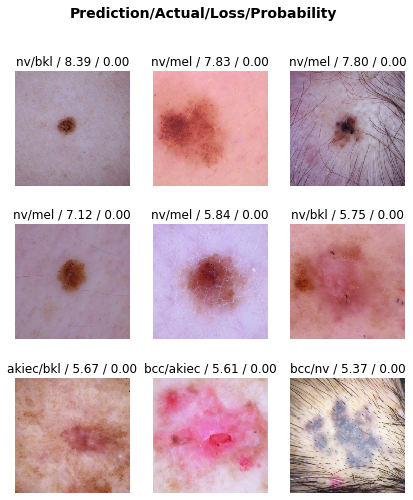

In [59]:
# confusion matrices and top loss plots

print(interps[0][1])
interps[0][0].plot_confusion_matrix()
interps[0][0].plot_top_losses(9, figsize=(7,8))

resnet152


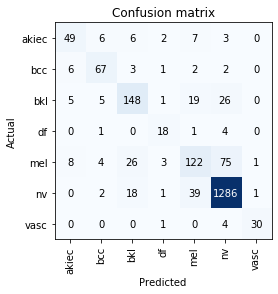

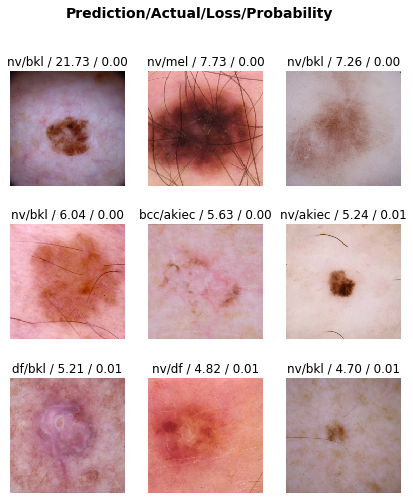

In [60]:
print(interps[1][1])
interps[1][0].plot_confusion_matrix()
interps[1][0].plot_top_losses(9, figsize=(7,8))


densenet201


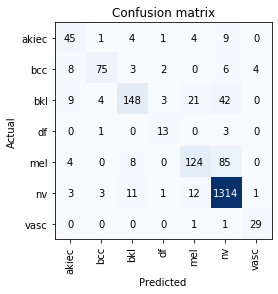

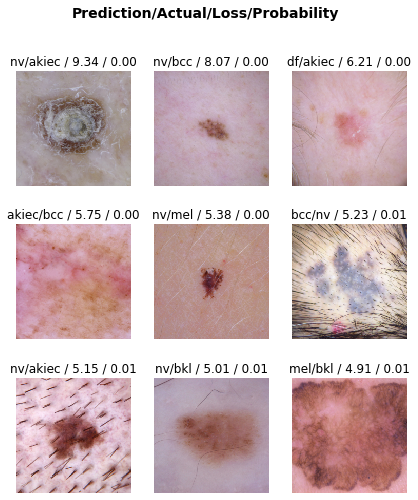

In [61]:
print(interps[2][1])
interps[2][0].plot_confusion_matrix()
interps[2][0].plot_top_losses(9, figsize=(7,8))


vgg19


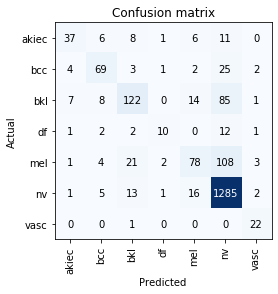

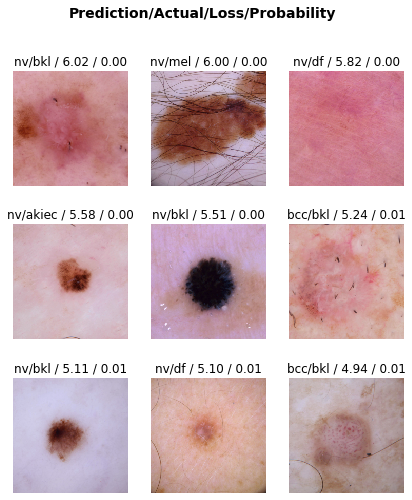

In [62]:
print(interps[3][1])
interps[3][0].plot_confusion_matrix()
interps[3][0].plot_top_losses(9, figsize=(7,8))


alexnet


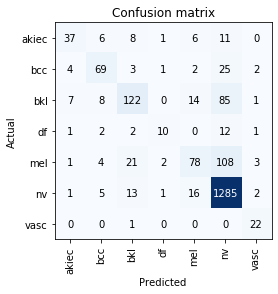

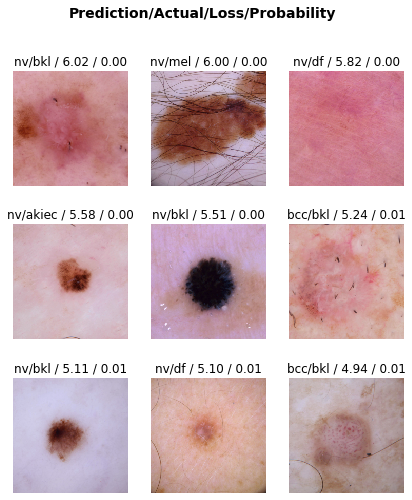

In [63]:
print(interps[4][1])
interps[4][0].plot_confusion_matrix()
interps[4][0].plot_top_losses(9, figsize=(7,8))


In [75]:
print('Tuple arrangement: Actual, predicted, # of occurences', '\n')
for i in range(len(interps)):
    print(interps[i][1])
    print(interps[i][0].most_confused(min_val=2))


Tuple arrangement: Actual, predicted, # of occurences 

resnet50
[('mel', 'nv', 89), ('bkl', 'nv', 50), ('nv', 'mel', 22), ('bkl', 'mel', 17), ('nv', 'bkl', 13), ('bkl', 'bcc', 11), ('mel', 'bkl', 11), ('akiec', 'bkl', 7), ('bcc', 'bkl', 7), ('bcc', 'nv', 7), ('akiec', 'bcc', 6), ('mel', 'akiec', 6), ('akiec', 'mel', 5), ('bcc', 'akiec', 5), ('nv', 'bcc', 4), ('bkl', 'akiec', 3), ('akiec', 'df', 2), ('akiec', 'nv', 2), ('bcc', 'mel', 2), ('bkl', 'df', 2), ('mel', 'bcc', 2), ('vasc', 'bcc', 2)]
resnet152
[('mel', 'nv', 75), ('nv', 'mel', 39), ('bkl', 'nv', 26), ('mel', 'bkl', 26), ('bkl', 'mel', 19), ('nv', 'bkl', 18), ('mel', 'akiec', 8), ('akiec', 'mel', 7), ('akiec', 'bcc', 6), ('akiec', 'bkl', 6), ('bcc', 'akiec', 6), ('bkl', 'akiec', 5), ('bkl', 'bcc', 5), ('df', 'nv', 4), ('mel', 'bcc', 4), ('vasc', 'nv', 4), ('akiec', 'nv', 3), ('bcc', 'bkl', 3), ('mel', 'df', 3), ('akiec', 'df', 2), ('bcc', 'mel', 2), ('bcc', 'nv', 2), ('nv', 'bcc', 2)]
densenet201
[('mel', 'nv', 85), ('bkl', 'n

In [82]:
worst = [data1, data2, data3, data4, data5]

for i in range(len(interps)):
    worst[i] = interps[0][0].most_confused(min_val=2)

In [90]:
df1 = pd.DataFrame(worst[0], columns =['Actual', 'Predicted', 'Occurences'])
df2 = pd.DataFrame(worst[1], columns =['Actual', 'Predicted', 'Occurences'])
df3 = pd.DataFrame(worst[2], columns =['Actual', 'Predicted', 'Occurences'])
df4 = pd.DataFrame(worst[3], columns =['Actual', 'Predicted', 'Occurences'])
df5 = pd.DataFrame(worst[4], columns =['Actual', 'Predicted', 'Occurences'])

In [91]:
df1.to_csv('resnet50.csv')
df2.to_csv('resnet152.csv')
df3.to_csv('densenet201.csv')
df4.to_csv('vgg19_bn.csv')
df5.to_csv('alexnet.csv')